# TimeSeries Project (e-commerce dataset)

Problems encountered in dataset:
- Columns separated with character (')
- Float separated with comma 
- Totale column with negative values

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import dataset and formatting types

In [163]:
df = pd.read_csv('.\data\serie-storiche-ecommerce.csv', quotechar="'", parse_dates=["data"])
df["totale"] = df["totale"].apply(lambda x : (x.replace(",", ".")))
df["totale"] = df["totale"].astype(float)
df.head()

,data,totale,settore
0,2013-02-01,815.97,Calcio
1,2013-02-21,4775.75,Fitness
2,2013-04-01,4775.75,Fitness
3,2013-04-06,1962.15,Casual
4,2013-07-09,1809.87,Basket


In [164]:
### descriptive analysis on total column
df["totale"].describe()

count     25261.000000
mean       7886.239314
std       13273.856514
min       -2159.180000
25%        1335.300000
50%        3948.860000
75%       10209.730000
max      516104.930000
Name: totale, dtype: float64

In [165]:
df.isnull().sum()

data       0
totale     0
settore    0
dtype: int64

In [180]:
df = df.where(df["totale"]>0)

### Data exploration

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25261 entries, 0 to 25260
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     25227 non-null  datetime64[ns]
 1   totale   25227 non-null  float64       
 2   settore  25227 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 493.4+ KB


In [182]:
### descriptive analysis on total column
df["totale"].describe()

count     25227.000000
mean       7896.953680
std       13279.580998
min           0.270000
25%        1337.210000
50%        3966.870000
75%       10224.470000
max      516104.930000
Name: totale, dtype: float64

<AxesSubplot:xlabel='data'>

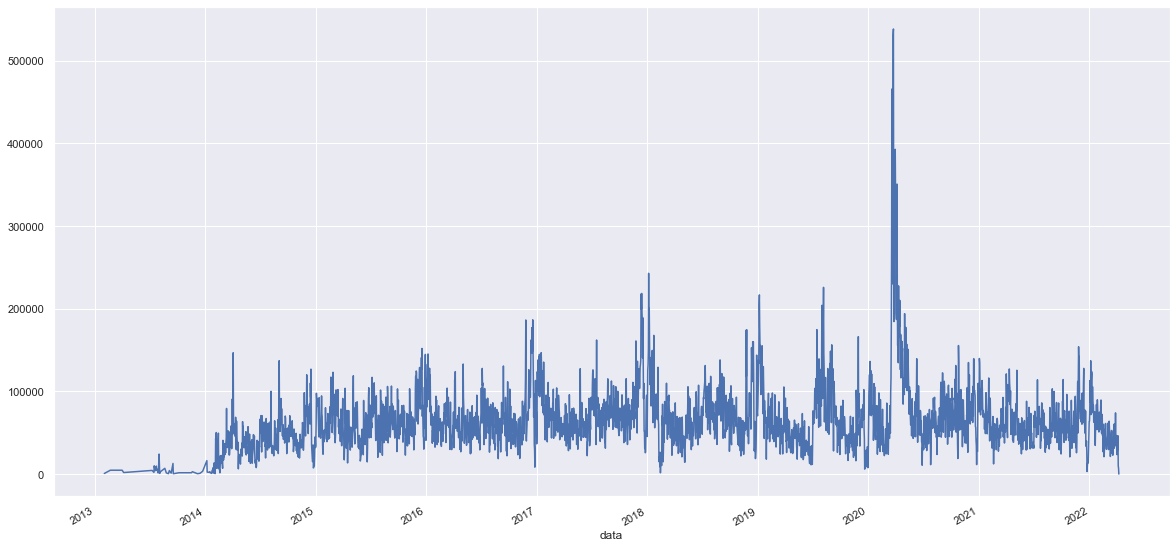

In [183]:
### Group by per data to sum total earnings
plt.figure(figsize=(20,10))
df.groupby(by="data", sort=True)["totale"].sum().plot()

<AxesSubplot:>

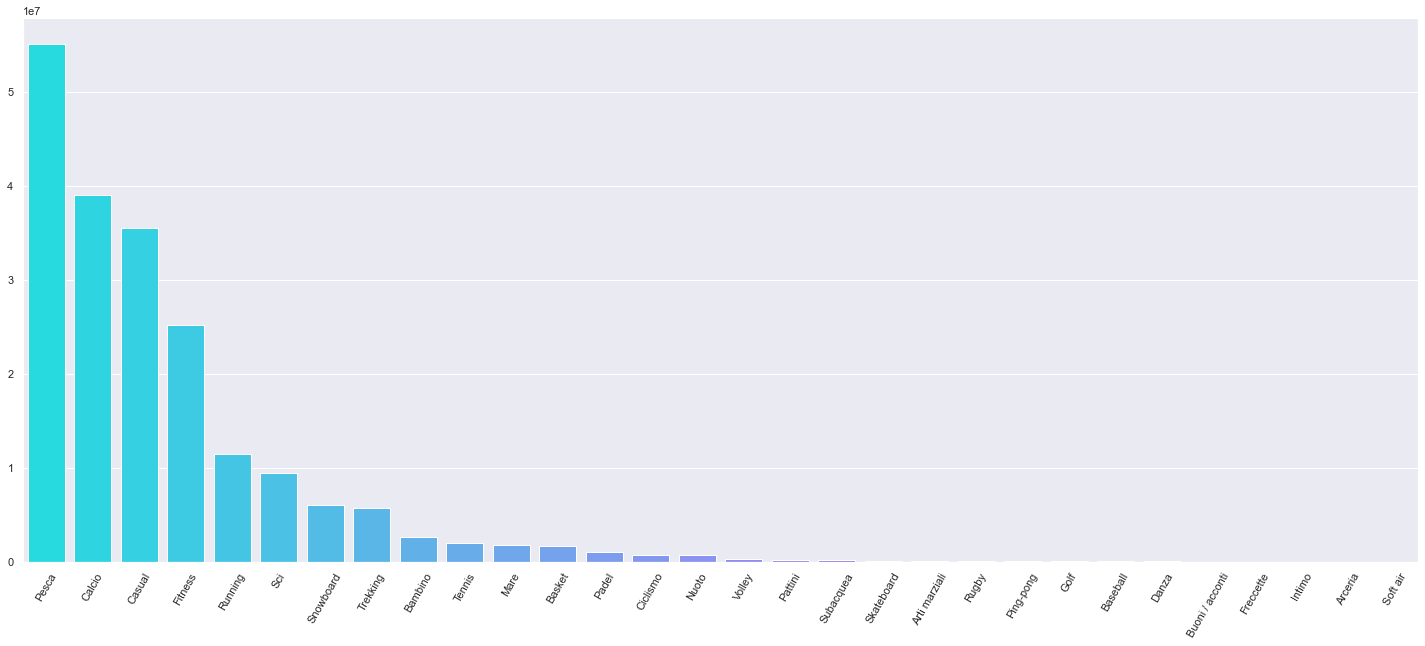

In [184]:
### Group by per category and sum up
df_groupby_settore = df.groupby(by=["settore"], sort=True)["totale"].sum().sort_values(ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
sns.barplot(x=list(df_groupby_settore.index), y=list(df_groupby_settore.values), palette="cool")


<AxesSubplot:xlabel='data'>

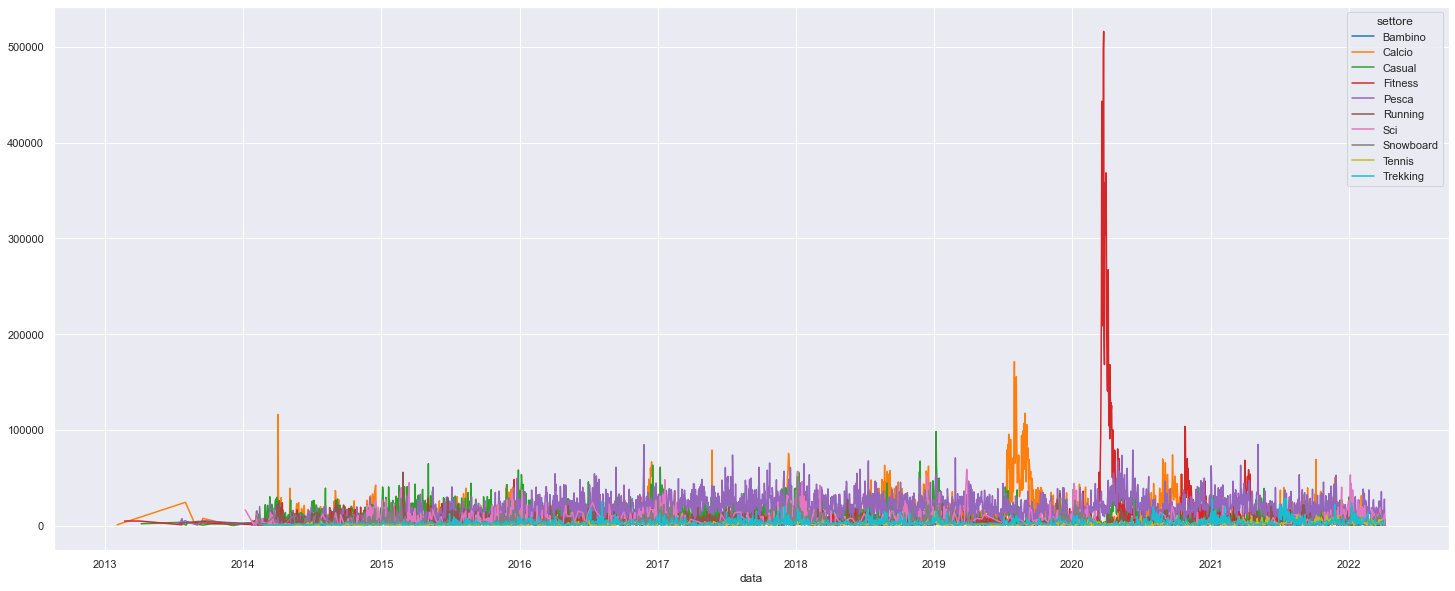

In [185]:
### time series group by higher sectors in total 
list_high_number_total = df_groupby_settore.index[0:10]
df_pivot_settore_and_data = (df.query("settore in @list_high_number_total")).pivot(index="data", columns="settore", values="totale")
plt.figure(figsize=(25,10))
sns.lineplot(data=df_pivot_settore_and_data, dashes=False, palette="tab10")

In [186]:
df_pivot_settore_and_data.describe()

settore,Bambino,Calcio,Casual,Fitness,Pesca,Running,Sci,Snowboard,Tennis,Trekking
count,1250.000000,2956.000000,2900.000000,2834.000000,2978.000000,2238.000000,1209.000000,1372.000000,972.000000,1514.000000
mean,2083.043672,13215.077493,12231.144103,8887.481136,18494.435480,5115.171332,7842.052672,4368.104964,2039.352294,3764.138137
std,2172.618008,13910.280138,9167.590532,27940.749429,11543.885015,4248.157510,8391.974503,5006.850072,2054.405058,3661.227758
min,81.870000,106.430000,54.580000,45.440000,36.840000,0.270000,2.730000,95.520000,36.840000,121.440000
25%,762.210000,5171.797500,5644.460000,2341.620000,10070.490000,2292.157500,1760.210000,1134.170000,614.030000,1335.300000
50%,1361.770000,9407.970000,10253.260000,4328.330000,16851.300000,3929.760000,5387.050000,2469.065000,1397.930000,2524.870000
75%,2676.467500,15947.525000,16424.757500,7727.827500,25013.057500,6854.840000,10902.360000,5681.095000,2863.402500,4947.202500
max,25858.090000,171365.370000,98255.460000,516104.930000,84700.250000,55733.000000,58780.480000,50980.720000,15268.760000,28574.540000


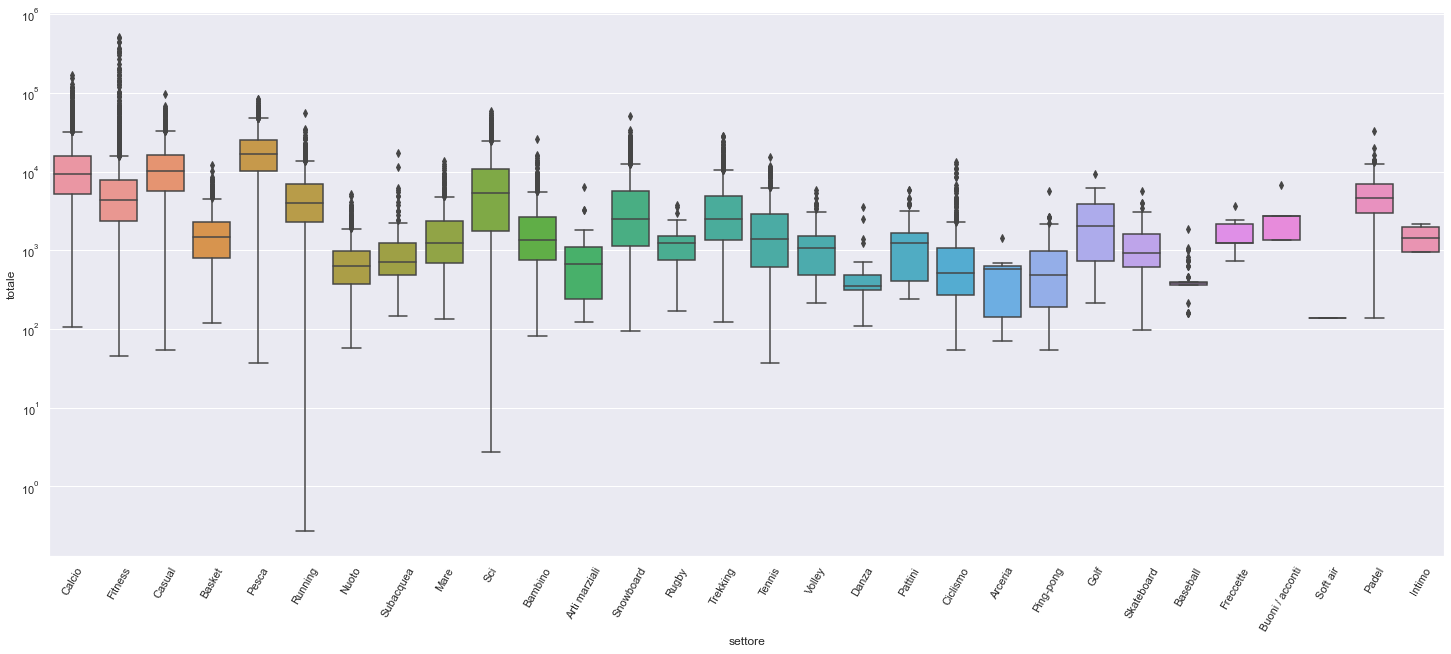

In [187]:
### boxplot to see correlation between cost spent and category
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
plot = sns.boxplot(data=df, x="settore", y="totale")
plot.set_yscale("log")

### Time series modeling